# <font color="red"><b>(Assignment 1) TF-IDF and Sentiment Analysis</b></font>
<font color="red">Assignment - Sentiment Analysis of Movie Reviews</font>

### <font color="#FF00FF">*Natural Language Processing: Zero to NLP*</font>

[Lecture Video](https://www.youtube.com/watch?v=6VnJqJCHdzo)

![](https://i.imgur.com/6Wfmf2S.png)

> **Problem Statement**: Apply the TF-IDF technique to train ML models for sentiment analysis using data from the "[Sentiment Analysis on Movie Reviews](https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews)" Kaggle competition.


Outline:

1. Download and Explore Dataset
2. Implement the TF-IDF Technique
3. Train baseline model & submit to Kaggle
4. Train & finetune different ML models
3. Document & submit your notebook


Dataset: https://www.kaggle.com/c/sentiment-analysis-on-movie-reviews


## Download and Explore the Data

Outline:

1. Download Dataset from Kaggle
2. Explore and visualize data

### Download Dataset from Kaggle

- Read the "Description", "Evaluation" and "Data" sections on the Kaggle competition page carefully
- Make sure to download the `kaggle.json` file from your [Kaggle account](https://kaggle.com/me/account) and upload it on Colab

In [1]:
import os

In [2]:
os.environ['KAGGLE_CONFIG_DIR'] = '.' # 'content' 也可以

In [3]:
!chmod 600 ./kaggle.json # 新增
!kaggle competitions download -c sentiment-analysis-on-movie-reviews

  0% 0.00/1.90M [00:00<?, ?B/s]
100% 1.90M/1.90M [00:00<00:00, 112MB/s]


In [4]:
!unzip sentiment-analysis-on-movie-reviews -d data

Archive:  sentiment-analysis-on-movie-reviews.zip
  inflating: data/sampleSubmission.csv  
  inflating: data/test.tsv.zip       
  inflating: data/train.tsv.zip      


In [5]:
train_fname = 'data/train.tsv.zip'
test_fname = 'data/test.tsv.zip'
sub_fname = 'data/sampleSubmission.csv'

### Explore and Visualize Data

* Load the train, test, and submission files using Pandas
* Explore rows, columns, sample values etc.
* Visualize distribution of target columns

In [6]:
import pandas as pd

In [7]:
raw_df = pd.read_csv(train_fname, sep='\t') ## tsv檔, 需要用 sep='\t'

In [8]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [9]:
raw_df.Phrase.sample(10).values

array(['this sneaky feel to it -- as if the director is trying to dupe the viewer into taking it all as Very Important simply because the movie is ugly to look at and not a Hollywood product',
       'a way of seeping into your consciousness', 'more substance',
       ", writer\\/director Achero Manas 's film is schematic and obvious .",
       "Filmmaker Stacy Peralta has a flashy editing style that does n't always jell with Sean Penn 's monotone narration , but he respects the material without sentimentalizing it",
       "Cagney 's ` top of the world ' has been replaced by the bottom of the barrel .",
       'Freudianism',
       'make everyone who has been there squirm with recognition',
       'by Gianni Versace', 'his star'], dtype=object)

In [10]:
test_df = pd.read_csv(test_fname, sep='\t')

In [11]:
test_df # column 中 不包含 `Sentiment', 因為此project的任務就是要判斷test_df中每一個`Phrase'的`Sentiment'結果

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [12]:
sub_df = pd.read_csv(sub_fname)

In [13]:
sub_df ## Sentiment 的值,之後要用所建立的模型對提供的PhraseId(對應到test_df)做出預測的值所取代

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


<Axes: >

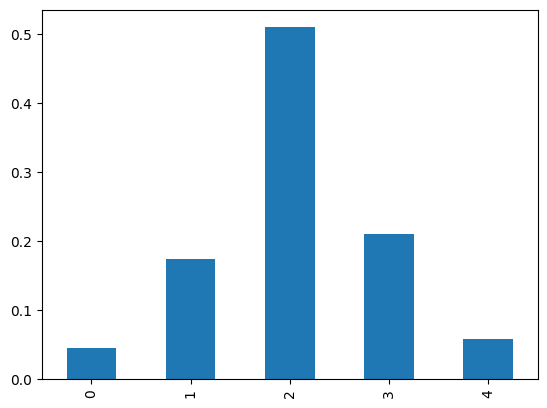

In [14]:
raw_df.Sentiment.value_counts(normalize=True).sort_index().plot(kind='bar')

Summarize your insights and learnings from the dataset below:

* `???`
* `???`
* `???`

## Implement TF-IDF Technique

![](https://i.imgur.com/5VbUPup.png)

Outline:

1. Learn the vocabulary using `TfidfVectorizer`
3. Transform training and test data

#### Learn Vocabulary using `TfidfVectorizer `

* Create custom tokenizer with stemming
* Create a list of stop words
* Configure and create `TfidfVectorizer `
* Learn vocubulary from training set
* View sample entries from vocabulary

In [15]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem.snowball import SnowballStemmer

In [16]:
nltk.download('punkt') ## .word_tokenize() 所需要的

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [17]:
word_tokenize('Is this (the) real, life?') ## 測試

['Is', 'this', '(', 'the', ')', 'real', ',', 'life', '?']

In [18]:
stemmer = SnowballStemmer(language='english')

In [19]:
stemmer.stem('going'), stemmer.stem('loving') ## 測試

('go', 'love')

In [20]:
def tokenize(text):
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha()] ## isalpha() 把 標點符號給排除

In [21]:
tokenize('Is this (the) real life, or is it; fantasy?') ## 測試

['is', 'this', 'the', 'real', 'life', 'or', 'is', 'it', 'fantasi']

In [22]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [23]:
from nltk.corpus import stopwords

In [24]:
english_stopwords = stopwords.words('english')

In [25]:
",".join(english_stopwords) ## (測試) a list of string -> a string

"i,me,my,myself,we,our,ours,ourselves,you,you're,you've,you'll,you'd,your,yours,yourself,yourselves,he,him,his,himself,she,she's,her,hers,herself,it,it's,its,itself,they,them,their,theirs,themselves,what,which,who,whom,this,that,that'll,these,those,am,is,are,was,were,be,been,being,have,has,had,having,do,does,did,doing,a,an,the,and,but,if,or,because,as,until,while,of,at,by,for,with,about,against,between,into,through,during,before,after,above,below,to,from,up,down,in,out,on,off,over,under,again,further,then,once,here,there,when,where,why,how,all,any,both,each,few,more,most,other,some,such,no,nor,not,only,own,same,so,than,too,very,s,t,can,will,just,don,don't,should,should've,now,d,ll,m,o,re,ve,y,ain,aren,aren't,couldn,couldn't,didn,didn't,doesn,doesn't,hadn,hadn't,hasn,hasn't,haven,haven't,isn,isn't,ma,mightn,mightn't,mustn,mustn't,needn,needn't,shan,shan't,shouldn,shouldn't,wasn,wasn't,weren,weren't,won,won't,wouldn,wouldn't"

In [26]:
selected_stopwords = english_stopwords[:115] ## 位置115之後, 很多字是屬於`負面'性質的,不被selected,意味著之後就不會被排除

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
def tokenize(text): ## 新增(更新)
  return [stemmer.stem(token) for token in word_tokenize(text) if token.isalpha() and token not in selected_stopwords]

In [29]:
vectorizer = TfidfVectorizer(token_pattern=None, ## 新增
                tokenizer = tokenize,
                # stop_words = selected_stopwords, ## 更新--把此option給隱藏
                ngram_range = (1,2), ## 考慮單詞和複合詞 (見下面詳解)
                max_features = 2000
                )

* <font color="red">`##  新增`與 `## 更新` ,修正了兩個提示警告(細節參考Lecture 3)</font>
* <font color="red">About `ngram_range`
> it is going to count the frequecies of all the individual words and then it is also going to count the frequencies of two words occurring together in a particular order(e.g., romantic comedy or action drama which may be a phrase used to describe a movie)</font>

In [30]:
vectorizer.fit(raw_df.Phrase)

TfidfVectorizer(max_features=2000, ngram_range=(1, 2), token_pattern=None,
                tokenizer=<function tokenize at 0x7b36661e27a0>)

In [31]:
len(vectorizer.vocabulary_) # 與之對應的 idf 是 vectorizer.idf_。 注意, vectorizer.vocabulary 是 NoneType

2000

In [32]:
vectorizer.get_feature_names_out()[:200] # len(vectorizer.get_feature_names_out()) = 2000

array(['abandon', 'abil', 'abl', 'absolut', 'absorb', 'abstract',
       'absurd', 'abus', 'accent', 'accept', 'access', 'accomplish',
       'accur', 'ach', 'achiev', 'across', 'act', 'action', 'action film',
       'action movi', 'action sequenc', 'actor', 'actress', 'actual',
       'ad', 'adam', 'adam sandler', 'adapt', 'add', 'addit', 'adequ',
       'admir', 'admit', 'adolesc', 'adult', 'adventur', 'affair',
       'affect', 'afraid', 'age', 'ago', 'ahead', 'aim', 'aimless', 'air',
       'alien', 'aliv', 'allen', 'allow', 'almost', 'alon', 'along',
       'alreadi', 'also', 'altern', 'although', 'alway', 'amateurish',
       'amaz', 'ambigu', 'ambit', 'ambiti', 'america', 'american',
       'among', 'amount', 'amus', 'analyz', 'angel', 'angst', 'anim',
       'ann', 'annoy', 'anoth', 'answer', 'anyon', 'anyth', 'apart',
       'appar', 'appeal', 'appear', 'appli', 'appreci', 'approach',
       'appropri', 'area', 'argu', 'argument', 'around', 'arriv', 'art',
       'artifici', '

### Transform Training & Test Data

* Transform phrases from training set
* Transform phrases from test set
* Look at some example values

In [35]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [33]:
inputs = vectorizer.transform(raw_df.Phrase) ## 時間長一點

In [36]:
inputs.shape

(156060, 2000)

In [35]:
inputs.toarray()[0][:100] ## 用.toarray()將csr_matrix轉成numpy.ndarray

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.27620188, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33022325, 0.29314979, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

* <font color="red">使用`TfidfVectorizer`求得training data 與 test data 的TF-IDF -- 也就是 `inputs` 與 `test_inputs` -- 的方式總結 </font>


```python
vectorizer = TfidfVectorizer(token_pattern=None,
                tokenizer = tokenize,
                ngram_range = (1,2),
                max_features = 2000)
"""方法一"""
vectorizer.fit(raw_df.Phrase)

inputs = vectorizer.transform(raw_df.Phrase)
"""方法二"""
inputs = vectorizer.fit_transform(raw_df.Phrase)


tests_inputs = vectorizer.transform(test_df.Phrase)
```


> * <font color="red">注意,`方法二`就是將`vectorizer.fit`與`vectorizer.transform`合併在一起執行。</font>
>
> * <font color="red">使用`TfidfVectorizer`,不論`方法一`或`方法二`,都可用以計算 test_df 的 TF-IDF 結果 </font>
>
> * <font color="red">以`DataFrame`的形式,顯示`inputs`中第1筆資料(第一個Phrase)的 tf-idf values</font>
>
>```python
>df = pd.DataFrame(inputs[0].T.todense(), index=vectorizer.get_feature_names_out(), columns=["tfidf"]) ## 法一
>df = pd.DataFrame(inputs[0].toarray()[0], index=vectorizer.get_feature_names_out(), columns=["tfidf"]) ## 法二
>df = pd.DataFrame(np.array(inputs[0].todense())[0], index=vectorizer.get_feature_names_out(), columns=["tfidf"]) ## 法三
>df.sort_values(by=["tfidf"],ascending=False)
>```






* <font color="red">補充</font>

```python
type(inputs.toarray())
## 輸出: numpy.ndarray

inputs.toarray().shape
## 輸出: (156060, 2000)

inputs
## 輸出: <156060x2000 sparse matrix of type '<class 'numpy.float64'>'
##	       with 467956 stored elements in Compressed Sparse Row format>
```





* <font color="red">使用`CountVectorizer`+`TfidfTransformer`計算 TF-IDF (另法)</font>


```python
from sklearn.feature_extraction.text import CountVectorizer

vct = CountVectorizer(token_pattern=None,
             tokenizer = tokenize,
             ngram_range = (1,2),
             max_features = 2000)

Xword_count = vct.fit_transform(raw_df.Phrase)
## Xword_count.shape
## 輸出(測試)結果:(156060, 2000)

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer(smooth_idf=True,use_idf=True)
## tfidf_transformer = TfidfTransformer()
## tf_idf_vector結果相同

"""方法一"""
tfidf_transformer.fit(Xword_count)

## (測試)輸出IDF結果
# pd.DataFrame(tfidf_transformer.idf_,
#        index=vct.get_feature_names_out(),
#        columns=["idf_weights"]).sort_values(by=['idf_weights'])

# count matrix
count_vector=vct.transform(raw_df.Phrase)
## 注意,在此輸入 training data (raw_df.Phrase) 所以count_vector與Xword_count是相同
## 但在實際的情況下,在此應該輸入 test data 也就是 count_vector=vct.transform(test_df.Phrase)

# tf-idf scores
tf_idf_vector=tfidf_transformer.transform(count_vector) ## 結果同 inputs


"""方法二"""
tf_idf_vector2 = tfidf_transformer.fit_transform(Xword_count) ## 結果同 inputs
```

> * <font color="red"> 注意,不能使用方法二套用在 test data 上,因為需要使用training data所 fit 出來的模型,套用在 test data</font>
>
>```python
>tcv = vct.transform(test_df.Phrase)
>tf_idf_vector2_err = tfidf_transformer.fit_transform(tcv) # 與 test_inputs(後面) 不同
>```
>
> * <font color="red"> 方法二要改成類似如下寫法,事實上幾乎等於方法一,這就多此一舉</font>
>
>```python
>tfidf_transformer.fit_transform(Xword_count)
>tcv = vct.transform(test_df.Phrase)
>tf_idf_vector2 = tfidf_transformer.transform(tcv) # 與 test_inputs(後面) 相同
>```

In [ ]:
test_df

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine
...,...,...,...
66287,222348,11855,"A long-winded , predictable scenario ."
66288,222349,11855,"A long-winded , predictable scenario"
66289,222350,11855,"A long-winded ,"
66290,222351,11855,A long-winded


In [35]:
test_inputs = vectorizer.transform(test_df.Phrase)

## Train Baseline Model & Submit to Kaggle

1. Split training and validation sets
2. Train logistic regression model
3. Study predictions on sample phrases
4. Make predictions and submit to Kaggle




### Split Training and Validation Sets

Tip: Don't use a random sample for validation set (why?)

In [ ]:
raw_df

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [ ]:
inputs

<156060x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 467956 stored elements in Compressed Sparse Row format>

In [36]:
TRAIN_SIZE = 110_000 ## python可以解析

In [37]:
train_inputs = inputs[:TRAIN_SIZE]
train_targets = raw_df.Sentiment[:TRAIN_SIZE]

In [40]:
train_inputs.shape, train_targets.shape

((110000, 2000), (110000,))

In [38]:
val_inputs = inputs[TRAIN_SIZE:]
val_targets = raw_df.Sentiment[TRAIN_SIZE:]

In [39]:
val_inputs.shape, val_targets.shape

((46060, 2000), (46060,))

In [47]:
type(train_targets)

pandas.core.series.Series

### Train Logistic Regression Model
[How to give values to LogisticRegression from a dictionary?](https://stackoverflow.com/questions/60696276/how-to-give-values-to-logisticregression-from-a-dictionary)



In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model = LogisticRegression()

In [43]:
model.fit(train_inputs, train_targets) ## 輸入資料: csr_matrix類型, 標籤：Series類型

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
train_preds = model.predict(train_inputs)

In [ ]:
train_targets

0         1
1         2
2         2
3         2
4         2
         ..
109995    1
109996    0
109997    1
109998    0
109999    2
Name: Sentiment, Length: 110000, dtype: int64

In [45]:
train_preds

array([3, 2, 2, ..., 0, 0, 2])

### Study Predictions on Sample Inputs

In [48]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(train_targets, train_preds)

0.6380636363636364

In [50]:
val_preds = model.predict(val_inputs)

In [ ]:
accuracy_score(val_targets, val_preds)

0.5783108988276161



---

### <font color="red">自訂模型</font>

In [70]:
model_itr = LogisticRegression(max_iter=500) ## 超過 500, performance 並沒有更好

In [71]:
model_itr.fit(train_inputs, train_targets)

LogisticRegression(max_iter=500)

In [72]:
accuracy_score(train_targets, model_itr.predict(train_inputs))

0.6384

In [73]:
accuracy_score(val_targets, model_itr.predict(val_inputs))

0.5794398610508033



---



In [91]:
model_cw = LogisticRegression(class_weight={0:0.05, 1:0.2, 2:0.5, 3:0.2, 4:0.05}) ## performance 沒有更好

In [92]:
model_cw.fit(train_inputs, train_targets)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.05, 1: 0.2, 2: 0.5, 3: 0.2, 4: 0.05})

In [93]:
accuracy_score(train_targets, model_cw.predict(train_inputs))

0.5581363636363637

In [94]:
accuracy_score(val_targets, model_cw.predict(val_inputs))

0.527181936604429



---



### Make Predictions & Submit to Kaggle

1. Make predictions on Test Dataset
2. Generate & submit CSV on Kaggle
3. Add screenshot of your score



In [ ]:
small_df = raw_df.sample(20)

In [ ]:
small_df

,PhraseId,SentenceId,Phrase,Sentiment
43743,43744,2121,that special annex,2
89634,89635,4663,the plot and a powerfully evocative mood,4
43687,43688,2118,rare to find a film to which the adjective ` g...,3
108101,108102,5719,commonplace,2
144172,144173,7826,movie time trip,2
67041,67042,3403,", one is left with a sour taste in one 's mout...",1
47002,47003,2290,combined with stunning animation .,4
116594,116595,6217,'s definitely worth taking a look,3
78278,78279,4028,"Directors John Musker and Ron Clements , the t...",2
136846,136847,7401,like being stuck in a dark pit having a nightm...,0


In [ ]:
small_inputs = vectorizer.transform(small_df.Phrase)

In [ ]:
small_inputs.shape

(20, 2000)

In [ ]:
small_preds = model.predict(small_inputs)

In [ ]:
small_preds

array([2, 3, 3, 2, 2, 1, 4, 3, 3, 1, 2, 2, 4, 2, 1, 2, 2, 3, 2, 3])

In [ ]:
test_inputs

<66292x2000 sparse matrix of type '<class 'numpy.float64'>'
	with 179917 stored elements in Compressed Sparse Row format>

In [56]:
test_preds = model.predict(test_inputs)

In [57]:
test_preds

array([3, 3, 2, ..., 2, 2, 1])

In [ ]:
type(test_preds)

numpy.ndarray

In [52]:
sub_df

,PhraseId,Sentiment
0,156061,2
1,156062,2
2,156063,2
3,156064,2
4,156065,2
...,...,...
66287,222348,2
66288,222349,2
66289,222350,2
66290,222351,2


In [54]:
sub_df.Sentiment.values

array([2, 2, 2, ..., 2, 2, 2])

In [58]:
sub_df.Sentiment = test_preds ## 把sub_df中Sentiment這一欄的值，用test_preds的值所取代

In [ ]:
sub_df.to_csv('submission.csv', index=None)

In [ ]:
!head submission.csv

PhraseId,Sentiment
156061,3
156062,3
156063,2
156064,3
156065,3
156066,3
156067,3
156068,2
156069,3



<font color="red">Suggestions from the Lecture:
* add class weights
* set some hyper parameters
* you can change the solver
* you can increase the number of iterations
</font>


## Train & Finetune Different ML Models

Train & finetune at least 2 other types of models

Models to try:
- Decision Trees <font color="red">很容易`overfit`(i.e.,traing score接近1, validation score 接近0)</font>
- Random Forests
- Gradient Boosting
- Naive Bayes
- SVM

Optional:
* Use PCA for dimensionality reduction
* Compare classification vs regression models


Tips:

- If using a regression model, make sure to round predictions to integer and clip to the range `[1,5]` <font color="red">(應該是`[0,4]`)</font>
- Track your progress in a copy of [this experiment tracking spreadsheet](https://docs.google.com/spreadsheets/d/1X-tifxAOAYeIA2J32hBGP5B0MPnZy_o-zOz1NbS-1Ig/edit?usp=sharing)


<font color="red">More descriptions about PCA (Lecture):
* Instead of using the entire 2000 columns of data for training each model which can take up a lot of memory and can also take a long time.
* You can reduce the number of Dimensions to maybe 100 or 200 using something called principal component analysis.
</font>

### Model 1 -- <font color="red">Naive Bayes</font>

In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
model1 = MultinomialNB() # 補充

In [62]:
model1.fit(train_inputs, train_targets)

MultinomialNB()

In [ ]:
accuracy_score(train_targets, model1.predict(train_inputs))

0.5848636363636364

In [ ]:
accuracy_score(val_targets, model1.predict(val_inputs))

0.5430091185410334



---
* <font color="red">加入`class_prior`</font>


In [64]:
model1 = MultinomialNB(class_prior=(0.05, 0.2, .5, 0.2, .05)) ## 結果好一點

In [65]:
model1.fit(train_inputs, train_targets)

MultinomialNB(class_prior=(0.05, 0.2, 0.5, 0.2, 0.05))

In [66]:
accuracy_score(train_targets, model1.predict(train_inputs))

0.5881272727272727

In [67]:
accuracy_score(val_targets, model1.predict(val_inputs))

0.5458966565349544

### Model 2

### Model 3

Best Model:

???

(include Kaggle score screenshot)

## Submission and Future Work


How to make a submission:

- Add documentation and explanations
- Clean up any stray code/comments
- Include a screenshot of your best score
- Make a submission on the assignment page
- Review evaluation criteria carefully


Future work:
- Try more machine learning models
- Try configuring CountVectorizer differently
- Try approaches other than bag of words
